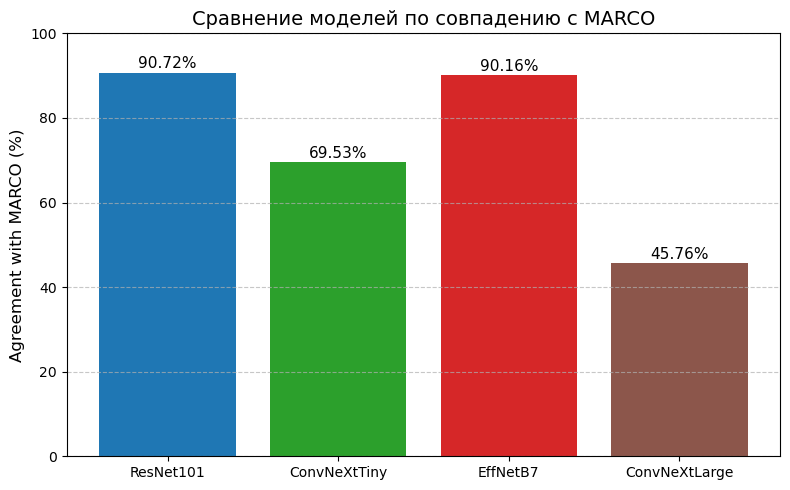

In [1]:
import matplotlib.pyplot as plt

def main():
    models = ["ResNet101", "ConvNeXtTiny", "EffNetB7", "ConvNeXtLarge"]
    # Согласие с MARCO (в %)
    acc = [90.72, 69.53, 90.16, 45.76]

    plt.figure(figsize=(8,5))
    plt.bar(models, acc, color=["#1f77b4","#2ca02c","#d62728","#8c564b"])
    plt.ylim(0,100)  # т.к. проценты
    plt.ylabel("Agreement with MARCO (%)", fontsize=12)
    plt.title("Сравнение моделей по совпадению с MARCO", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    for i, v in enumerate(acc):
        plt.text(i, v+1, f"{v:.2f}%", ha="center", fontsize=11)
    
    plt.tight_layout()
    plt.show()

if __name__=="__main__":
    main()


ValueError: unknown is not supported

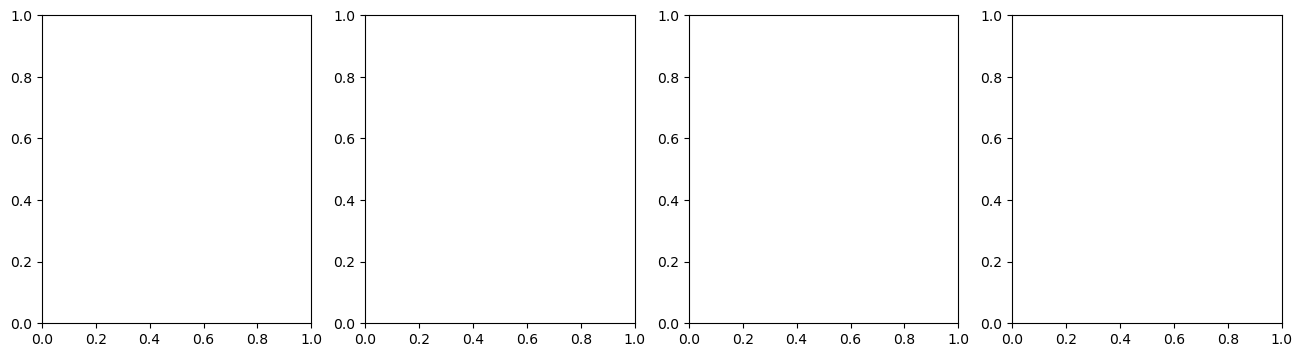

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_mat(y_true, y_pred, model_name, ax, class_names):
    """
    Строит confusion matrix в Axes ax для одной модели.
    y_true, y_pred - списки int (0..3)
    model_name - названия модели (строка)
    class_names - список названий классов
    """
    cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_title(model_name)

def main():
    # Предположим, 4 класса:
    class_names = ["Crystals","Other","Precip","Clear"]

    # y_true: истинные классы
    y_true = [...]  # len=n
    # Для каждой модели - свой предикт
    y_pred_resnet = [...]
    y_pred_convnext = [...]
    y_pred_effnet = [...]
    y_pred_convlarge = [...]

    fig, axes = plt.subplots(1,4, figsize=(16,4))

    # ResNet
    plot_conf_mat(y_true, y_pred_resnet, "ResNet101", axes[0], class_names)
    # ConvNeXtTiny
    plot_conf_mat(y_true, y_pred_convnext, "ConvNeXtTiny", axes[1], class_names)
    # EffNetB7
    plot_conf_mat(y_true, y_pred_effnet, "EffNetB7", axes[2], class_names)
    # ConvNeXtLarge
    plot_conf_mat(y_true, y_pred_convlarge, "ConvNeXtLarge", axes[3], class_names)

    plt.tight_layout()
    plt.show()

if __name__=="__main__":
    main()


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os

def main():
    # Создадим папку output, чтобы сохранять картинки туда
    out_dir = "infographics_output"
    os.makedirs(out_dir, exist_ok=True)

    # 1) Диаграмма конвейера (Pipeline)
    fig_pipeline = draw_pipeline_diagram()
    fig_pipeline.savefig(os.path.join(out_dir, "1_pipeline.png"), dpi=150, bbox_inches="tight")
    plt.close(fig_pipeline)

    # 2) Гистограмма тестовой точности (Bar Chart)
    fig_bar = draw_bar_accuracy()
    fig_bar.savefig(os.path.join(out_dir, "2_bar_accuracy.png"), dpi=150, bbox_inches="tight")
    plt.close(fig_bar)

    # 3) Линейный график (Epoch vs Accuracy)
    fig_line = draw_line_epochs()
    fig_line.savefig(os.path.join(out_dir, "3_line_epochs.png"), dpi=150, bbox_inches="tight")
    plt.close(fig_line)

    # 4) Схема CNN vs Transformer
    fig_arch = draw_cnn_vs_transformer()
    fig_arch.savefig(os.path.join(out_dir, "4_cnn_vs_transformer.png"), dpi=150, bbox_inches="tight")
    plt.close(fig_arch)

    print(f"Готово! Изображения сохранены в папку '{out_dir}'")

def draw_pipeline_diagram():
    """
    Простейшая схемка pipeline: 
    [Raw Images] -> [MARCO auto-label] -> [Train Data / Test Data] -> [Neural Nets] -> [Predictions]
    С помощью Matplotlib Patch + Annotation (arrows).
    """
    fig, ax = plt.subplots(figsize=(8,5))
    ax.set_xlim(0,10)
    ax.set_ylim(0,6)
    ax.axis("off")

    # Прямоугольники (x, y, width, height)
    # Raw images
    ax.add_patch(patches.Rectangle((0.5,4), 2,1.2, edgecolor="black", facecolor="#FCE5CD"))
    ax.text(1.5, 4.6, "Raw Images\n(кристаллы)", ha="center", va="center", fontsize=10)
    # MARCO
    ax.add_patch(patches.Rectangle((3.5,4), 2,1.2, edgecolor="black", facecolor="#D9EAD3"))
    ax.text(4.5, 4.6, "MARCO\n(auto-label)", ha="center", va="center", fontsize=10)
    # Train/Test
    ax.add_patch(patches.Rectangle((6.5,4), 2,1.2, edgecolor="black", facecolor="#C9DAF8"))
    ax.text(7.5, 4.6, "Train / Test\nSplit", ha="center", va="center", fontsize=10)

    # Neural Nets
    ax.add_patch(patches.Rectangle((3.5,2), 3,1.2, edgecolor="black", facecolor="#FFF2CC"))
    ax.text(5, 2.6, "Neural Nets\n(ResNet / ConvNeXt / etc.)", ha="center", va="center", fontsize=10)
    # Predictions
    ax.add_patch(patches.Rectangle((7.5,2), 2,1.2, edgecolor="black", facecolor="#EA9999"))
    ax.text(8.5,2.6, "Predictions:\nCrystals?", ha="center", va="center", fontsize=10)

    # Стрелки
    arrowprops = dict(arrowstyle="->", color="black", linewidth=1)
    # Row1
    ax.annotate("", xy=(3.5,4.6), xytext=(2.5,4.6), arrowprops=arrowprops)
    ax.annotate("", xy=(6.5,4.6), xytext=(5.5,4.6), arrowprops=arrowprops)
    # Вниз
    ax.annotate("", xy=(4.5,3.9), xytext=(4.5,3.2), arrowprops=arrowprops)
    ax.annotate("", xy=(7.5,3.9), xytext=(7.5,3.2), arrowprops=arrowprops)
    # Row2
    ax.annotate("", xy=(7.5,2.6), xytext=(6.5,2.6), arrowprops=arrowprops)

    ax.set_title("Pipeline Diagram", fontsize=14)
    return fig

def draw_bar_accuracy():
    """
    Гистограмма показателей Test Accuracy разных моделей:
    ResNet101, ConvNeXt Tiny, EfficientNetB7, SwinV2 Huge...
    (Данные выдуманы/примерные)
    """
    models = ["ResNet101", "ConvNeXt\nTiny", "EffNetB7", "SwinV2\nHuge"]
    acc = [91.2, 69.5, 93.7, 88.4]   # Выдуманные

    fig, ax = plt.subplots(figsize=(6,4))
    bars = ax.bar(models, acc, color=["#A4C2F4","#B6D7A8","#FFD966","#F4CCCC"])
    ax.set_ylim(0,100)
    ax.set_ylabel("Test Accuracy (%)")
    ax.set_title("Test Accuracy vs MARCO labels")

    # Подписать столбики
    for rect,v in zip(bars,acc):
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, h+1, f"{v:.1f}%", ha="center", va="bottom", fontsize=9)

    ax.grid(axis="y", linestyle="--", alpha=0.7)
    return fig

def draw_line_epochs():
    """
    Линейный график: epoch vs train/test accuracy
    (просто случайные данные для примера)
    """
    np.random.seed(42)
    epochs = np.arange(1,21)
    train_acc = 70 + np.cumsum(np.random.randn(20)*0.4)  # вокруг ~70->85
    test_acc  = train_acc - (np.random.rand(20)*2 + 2)

    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(epochs, train_acc, marker="o", label="Train Accuracy", color="#2E86C1")
    ax.plot(epochs, test_acc, marker="s", label="Test Accuracy", color="#E74C3C")
    ax.set_ylim(50,100)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy (%)")
    ax.set_title("Epoch vs Accuracy (пример)")
    ax.grid(True, alpha=0.5)
    ax.legend(loc="lower right")
    return fig

def draw_cnn_vs_transformer():
    """
    Условная инфографика: "CNN vs Transformer".
    Создадим 2 больших блока, показывающих два пути
    (Слева - CNN, справа - Transformer).
    """
    fig, ax = plt.subplots(figsize=(8,4))
    ax.axis("off")
    ax.set_xlim(0,8)
    ax.set_ylim(0,3)

    # Левый блок: CNN
    ax.add_patch(patches.Rectangle((0.5,0.5), 3,2, edgecolor="black", facecolor="#D9EAD3"))
    ax.text(2,2.2, "CNN-based\n(ResNet,\nConvNeXt,\nEffNet...)", ha="center", va="top", fontsize=12)
    # Короткая схема
    # "image -> conv -> conv -> fc"
    ax.text(1.2,1.1, "image\n(224x224)", fontsize=9, ha="center")
    arrowprops = dict(arrowstyle="->", color="black", linewidth=1)
    ax.annotate("", xy=(1.7,1.3), xytext=(1.4,1.3), arrowprops=arrowprops)
    ax.text(2.25,1.1, "conv layers\nfeature maps", fontsize=9, ha="center")
    ax.annotate("", xy=(2.8,1.3), xytext=(2.6,1.3), arrowprops=arrowprops)
    ax.text(3.4,1.1, "fc\nhead", fontsize=9, ha="center")

    # Правый блок: Transformer
    ax.add_patch(patches.Rectangle((4.5,0.5), 3,2, edgecolor="black", facecolor="#FFF2CC"))
    ax.text(6,2.2, "Transformer-based\n(ViT,\nSwin,\netc.)", ha="center", va="top", fontsize=12)
    # "image -> patch embed -> multi-head attention -> mlp head"
    ax.text(5.2,1.1, "image\npatches", fontsize=9, ha="center")
    ax.annotate("", xy=(5.7,1.3), xytext=(5.5,1.3), arrowprops=arrowprops)
    ax.text(6.2,1.1, "MH\nAttention", fontsize=9, ha="center")
    ax.annotate("", xy=(6.7,1.3), xytext=(6.5,1.3), arrowprops=arrowprops)
    ax.text(7.3,1.1, "MLP\nhead", fontsize=9, ha="center")

    ax.set_title("CNN vs Transformer (схематично)", fontsize=14)
    return fig


# -------------------------------
# Простейшая функция разбора CSV (не используется здесь)
def parse_marco_csv(csv_path):
    return []

if __name__=="__main__":
    main()


Готово! Изображения сохранены в папку 'infographics_output'


In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import os

# Абсолютный путь к каталогу с файлами
ARCHIVE_PATH = r"C:\Diploma\archive"

def get_predicted_label(row):
    """
    Выбирает класс с максимальным значением из столбцов "Crystal", "Other", "Precipitate" и "Clear".
    Используется, если файл содержит сырые прогнозы по каждому классу.
    """
    classes = ["Crystal", "Other", "Precipitate", "Clear"]
    try:
        values = [float(row[c]) for c in classes]
    except Exception as e:
        print("Ошибка при приведении к float:", e)
        return None
    max_idx = np.argmax(values)
    return classes[max_idx]

def main():
    # Путь к файлу с истинными метками
    gold_labels_file = os.path.join(ARCHIVE_PATH, "gold_labels_gui.csv")
    
    try:
        gold_df = pd.read_csv(gold_labels_file)
    except Exception as e:
        print(f"Ошибка при чтении {gold_labels_file}: {e}")
        return

    # Проверяем, есть ли нужные колонки.
    expected_cols = ["filename", "gold_label"]
    if not all(col in gold_df.columns for col in expected_cols):
        if len(gold_df.columns) == 2:
            gold_df.columns = expected_cols
            print("Переименованы колонки gold_labels_gui.csv в:", expected_cols)
        else:
            print("В файле gold_labels_gui.csv должны быть колонки 'filename' и 'gold_label'.")
            print("Найденные колонки:", gold_df.columns.tolist())
            return

    # Список файлов с предсказаниями
    prediction_files = [
        "gold_Marco_preds.csv",
        "gold_ResNet101_preds.csv",
        "gold_ConvNeXtLarge_preds.csv",
        "gold_ConvNeXtTiny_preds.csv",
        "gold_EffNetB7_preds.csv"
    ]

    for file in prediction_files:
        file_path = os.path.join(ARCHIVE_PATH, file)
        print(f"\nОбработка файла: {file_path}", flush=True)
        try:
            preds_df = pd.read_csv(file_path)
        except Exception as e:
            print(f"Ошибка при чтении {file_path}: {e}", flush=True)
            continue

        # Определяем, какая структура файла:
        required_cols_raw = ["filename", "Crystal", "Other", "Precipitate", "Clear"]
        if all(col in preds_df.columns for col in required_cols_raw):
            preds_df["predicted_label"] = preds_df.apply(get_predicted_label, axis=1)
        elif "image_name" in preds_df.columns and "predicted_label" in preds_df.columns:
            preds_df = preds_df.rename(columns={"image_name": "filename"})
        else:
            print(f"Файл {file_path} не содержит ожидаемых колонок.", flush=True)
            print("Найденные колонки:", preds_df.columns.tolist(), flush=True)
            continue

        # Объединяем по колонке 'filename' с истинными метками
        merged_df = pd.merge(gold_df, preds_df, on="filename")
        if merged_df.empty:
            print("После объединения нет строк. Проверьте совпадение названий файлов.", flush=True)
            continue

        # Определяем, какие метки присутствуют в истинных данных
        unique_gold = set(merged_df["gold_label"].unique())
        expected_labels = {"Crystal", "Other", "Precipitate", "Clear"}
        intersection = unique_gold.intersection(expected_labels)
        if not intersection:
            print("Предупреждение: ни одна из ожидаемых меток не найдена в gold_label.")
            print("Уникальные метки в gold_label:", unique_gold)
            labels_to_use = sorted(unique_gold)
        else:
            labels_to_use = ["Crystal", "Other", "Precipitate", "Clear"]

        # Вычисляем точность: сравниваем gold_label с predicted_label
        accuracy = (merged_df["gold_label"] == merged_df["predicted_label"]).mean()
        print(f"{file}: Accuracy = {accuracy:.2%}", flush=True)

        # Вычисляем матрицу ошибок
        try:
            conf_matrix = confusion_matrix(
                merged_df["gold_label"], 
                merged_df["predicted_label"], 
                labels=labels_to_use
            )
        except ValueError as e:
            print("Ошибка при вычислении confusion_matrix:", e, flush=True)
            continue
        
        conf_df = pd.DataFrame(conf_matrix, 
                               index=labels_to_use, 
                               columns=labels_to_use)
        print("Confusion matrix:", flush=True)
        print(conf_df, flush=True)

if __name__ == "__main__":
    main()


Переименованы колонки gold_labels_gui.csv в: ['filename', 'gold_label']

Обработка файла: C:\Diploma\archive\gold_Marco_preds.csv
Предупреждение: ни одна из ожидаемых меток не найдена в gold_label.
Уникальные метки в gold_label: {0, 2, 3}
gold_Marco_preds.csv: Accuracy = 55.56%
Confusion matrix:
    0   2   3
0  10   0   0
2   8  24  22
3   0  12  21

Обработка файла: C:\Diploma\archive\gold_ResNet101_preds.csv
Предупреждение: ни одна из ожидаемых меток не найдена в gold_label.
Уникальные метки в gold_label: {0, 2, 3}
gold_ResNet101_preds.csv: Accuracy = 54.55%
Confusion matrix:
    0   2   3
0  11   0   1
2   8  23  23
3   0  13  20

Обработка файла: C:\Diploma\archive\gold_ConvNeXtLarge_preds.csv
Предупреждение: ни одна из ожидаемых меток не найдена в gold_label.
Уникальные метки в gold_label: {0, 2, 3}
gold_ConvNeXtLarge_preds.csv: Accuracy = 33.33%
Confusion matrix:
   0  2   3
0  0  0  12
2  0  0  54
3  0  0  33

Обработка файла: C:\Diploma\archive\gold_ConvNeXtTiny_preds.csv
Пред

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    """
    Создаём 2 файла:
      1) bar_comparison.png — отдельная столбиковая диаграмма точности (accuracy)
      2) combined_cm.png — единая картинка с 5 матрицами ошибок (confusion matrix)
    """

    # 1) Данные точности (accuracy) (примеры, подставьте свои):
    #    Пять моделей: "Marco", "ResNet101", "ConvNeXtLarge", "ConvNeXtTiny", "EffNetB7"
    accuracies = {
        "Marco":          55.56,
        "ResNet101":      54.55,
        "ConvNeXtLarge":  33.33,
        "ConvNeXtTiny":   41.41,
        "EffNetB7":       52.53
    }

    # 2) Матрицы ошибок (3x3) для каждой модели
    #    По логам: классы = {0,2,3}. 
    #    Пример:
    cm_Marco = np.array([
        [10,  0,  0],
        [ 8, 24, 22],
        [ 0, 12, 21]
    ])
    cm_ResNet101 = np.array([
        [11,  0,  1],
        [ 8, 23, 23],
        [ 0, 13, 20]
    ])
    cm_ConvNeXtLarge = np.array([
        [ 0,  0, 12],
        [ 0,  0, 54],
        [ 0,  0, 33]
    ])
    cm_ConvNeXtTiny = np.array([
        [ 0,  2, 10],
        [ 0, 21, 33],
        [ 0, 13, 20]
    ])
    cm_EffNetB7 = np.array([
        [11,  0,  0],
        [11, 21, 22],
        [ 0, 13, 20]
    ])

    # Собираем их в единый словарь: {model -> (acc, cm)}
    results = {
      "Marco":          (accuracies["Marco"],          cm_Marco),
      "ResNet101":      (accuracies["ResNet101"],      cm_ResNet101),
      "ConvNeXtLarge":  (accuracies["ConvNeXtLarge"],  cm_ConvNeXtLarge),
      "ConvNeXtTiny":   (accuracies["ConvNeXtTiny"],   cm_ConvNeXtTiny),
      "EffNetB7":       (accuracies["EffNetB7"],       cm_EffNetB7)
    }

    # Подписи классов (ось X/Y в CM)
    class_labels = ["0(Кристаллы)", "2(Осадки)", "3(Чистота)"]

    # Создаём папку для вывода
    out_dir = "infographics_output"
    os.makedirs(out_dir, exist_ok=True)

    # 1) Рисуем отдельный столбиковый график
    out_bar = os.path.join(out_dir, "bar_comparison.png")
    plot_bar_accuracy(accuracies, out_bar)

    # 2) Рисуем общую картинку с матрицами ошибок (5 шт)
    out_cm = os.path.join(out_dir, "combined_cm.png")
    plot_combined_cm(results, class_labels, out_cm)

    print("Готово!")

def plot_bar_accuracy(accuracies, out_path):
    """
    Строит столбиковую диаграмму (bar chart) точности для всех моделей.
    Сохраняет в out_path с высоким DPI.
    """
    model_names = list(accuracies.keys())
    model_accs  = [accuracies[m] for m in model_names]

    fig, ax = plt.subplots(figsize=(7,4))
    # Можно подобрать цвета для каждой модели (или оставить однообразно)
    colors = ["#AEC6CF","#FFDAB9","#C7CEEA","#FFB7B2","#B5EAD7"]
    bars = ax.bar(model_names, model_accs, color=colors)
    ax.set_ylim(0,100)
    ax.set_ylabel("Точность (%)", fontsize=9)
    ax.set_title("Сравнение моделей (Золотой набор)", fontsize=10)
    ax.grid(axis="y", linestyle="--", alpha=0.7)

    # Уменьшаем шрифт tick labels, наклоним x
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    plt.setp(ax.get_xticklabels(), rotation=20, ha="right")

    # Подписываем %
    for i, rect in enumerate(bars):
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2, h+1,
                f"{model_accs[i]:.2f}%",
                ha="center", va="bottom", fontsize=8)

    fig.tight_layout()
    fig.savefig(out_path, dpi=300)
    plt.close(fig)
    print(f"Бар-график сохранён по пути: {out_path}")

def plot_combined_cm(results, class_labels, out_path):
    """
    Рисует матрицы ошибок для 5 моделей 
    (Marco, ResNet101, ConvNeXtLarge, ConvNeXtTiny, EffNetB7)
    на сетке 2x3 => 6 ячеек, последняя пустая.

    results: dict {model_name -> (accuracy, cm_array)}
    class_labels: ["0(Кристаллы)","2(Осадки)","3(Чистота)"]
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Порядок, в каком хотим выводить
    ordered_models = ["Marco","ResNet101","ConvNeXtLarge","ConvNeXtTiny","EffNetB7"]
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
    fig.suptitle("Матрицы ошибок на Золотом наборе", fontsize=14)

    # 2x3 => 6 подграфиков
    # row0: col0->Marco, col1->ResNet101, col2->ConvNeXtLarge
    # row1: col0->ConvNeXtTiny, col1->EffNetB7, col2->пусто
    positions = [
      (0,0,"Marco"),
      (0,1,"ResNet101"),
      (0,2,"ConvNeXtLarge"),
      (1,0,"ConvNeXtTiny"),
      (1,1,"EffNetB7")
    ]
    # (1,2) => пусто

    for (r,c,model) in positions:
        acc, cm = results[model]
        ax_cm = axes[r,c]
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_labels, yticklabels=class_labels, ax=ax_cm)
        ax_cm.set_title(f"{model}\nAcc={acc:.2f}%", fontsize=10)
        ax_cm.set_xlabel("Предсказано", fontsize=9)
        ax_cm.set_ylabel("Истинное", fontsize=9)
        ax_cm.tick_params(axis='x', labelsize=8)
        ax_cm.tick_params(axis='y', labelsize=8)

    # Отключаем последний subplot
    axes[1,2].axis("off")

    fig.tight_layout(rect=[0,0,1,0.95])
    fig.savefig(out_path, dpi=300)
    plt.close(fig)
    print(f"Объединённая картинка с матрицами ошибок сохранена по пути: {out_path}")


if __name__=="__main__":
    main()


Бар-график сохранён по пути: infographics_output\bar_comparison.png
Объединённая картинка с матрицами ошибок сохранена по пути: infographics_output\combined_cm.png
Готово!


In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

def main():
    """
    Пример скрипта:
    1) Мы храним логи в переменных `LOG_FOLD1`, `LOG_FOLD3` (или любой другой).
    2) Парсим строки, извлекаем epoch, train_acc, val_acc, model_name.
    3) Строим lineplot epoch vs. acc (train/val) для каждой модели.
    4) Отдельно строим barplot "best_acc" каждого fold.
    """

    # 1) Храним логи для fold=1 (ResNet & EffNet) и fold=3 (DenseNet)...
    LOG_FOLD1 = """===== Fold 1/5 =====     
Обучаем resnet101, fold=1
   Epoch [1/30] train_acc=0.748, val_acc=0.757
   Epoch [2/30] train_acc=0.747, val_acc=0.757
   Epoch [3/30] train_acc=0.743, val_acc=0.757
   Epoch [4/30] train_acc=0.751, val_acc=0.757
   Epoch [5/30] train_acc=0.752, val_acc=0.757
   Epoch [6/30] train_acc=0.752, val_acc=0.759
   Epoch [7/30] train_acc=0.751, val_acc=0.757
   Epoch [8/30] train_acc=0.755, val_acc=0.757
   Epoch [9/30] train_acc=0.746, val_acc=0.716
   Epoch [10/30] train_acc=0.747, val_acc=0.761
   Epoch [11/30] train_acc=0.750, val_acc=0.767
   Epoch [12/30] train_acc=0.750, val_acc=0.701
   Epoch [13/30] train_acc=0.751, val_acc=0.749
   Epoch [14/30] train_acc=0.754, val_acc=0.757
   Epoch [15/30] train_acc=0.754, val_acc=0.757
   Epoch [16/30] train_acc=0.755, val_acc=0.721
   Epoch [17/30] train_acc=0.753, val_acc=0.758
   Epoch [18/30] train_acc=0.746, val_acc=0.752
   Epoch [19/30] train_acc=0.754, val_acc=0.777
   Epoch [20/30] train_acc=0.754, val_acc=0.757
   Epoch [21/30] train_acc=0.766, val_acc=0.757
   Epoch [22/30] train_acc=0.770, val_acc=0.761
   Epoch [23/30] train_acc=0.770, val_acc=0.766
   Epoch [24/30] train_acc=0.781, val_acc=0.796
   Epoch [25/30] train_acc=0.782, val_acc=0.794
   Epoch [26/30] train_acc=0.787, val_acc=0.787
   Epoch [27/30] train_acc=0.783, val_acc=0.826
   Epoch [28/30] train_acc=0.790, val_acc=0.777
   Epoch [29/30] train_acc=0.778, val_acc=0.785
   Epoch [30/30] train_acc=0.789, val_acc=0.761
resnet101, fold=1, best_acc=0.826
Обучаем efficientnet_b7, fold=1
   Epoch [1/30] train_acc=0.732, val_acc=0.757
   Epoch [2/30] train_acc=0.754, val_acc=0.757
   Epoch [3/30] train_acc=0.754, val_acc=0.757
   Epoch [4/30] train_acc=0.755, val_acc=0.757
   Epoch [5/30] train_acc=0.755, val_acc=0.757
   Epoch [6/30] train_acc=0.756, val_acc=0.757
   Epoch [7/30] train_acc=0.756, val_acc=0.757
   Epoch [8/30] train_acc=0.754, val_acc=0.757
   Epoch [9/30] train_acc=0.756, val_acc=0.757
   Epoch [10/30] train_acc=0.757, val_acc=0.757
   Epoch [11/30] train_acc=0.754, val_acc=0.757
   Epoch [12/30] train_acc=0.755, val_acc=0.757
   Epoch [13/30] train_acc=0.755, val_acc=0.757
   Epoch [14/30] train_acc=0.755, val_acc=0.757
   Epoch [15/30] train_acc=0.756, val_acc=0.757
   Epoch [16/30] train_acc=0.756, val_acc=0.722
   Epoch [17/30] train_acc=0.748, val_acc=0.759
   Epoch [18/30] train_acc=0.755, val_acc=0.757
   Epoch [19/30] train_acc=0.750, val_acc=0.761
   Epoch [20/30] train_acc=0.756, val_acc=0.760
   Epoch [21/30] train_acc=0.754, val_acc=0.757
   Epoch [22/30] train_acc=0.754, val_acc=0.788
   Epoch [23/30] train_acc=0.757, val_acc=0.757
   Epoch [24/30] train_acc=0.756, val_acc=0.768
   Epoch [25/30] train_acc=0.760, val_acc=0.794
   Epoch [26/30] train_acc=0.760, val_acc=0.812
   Epoch [27/30] train_acc=0.756, val_acc=0.795
   Epoch [28/30] train_acc=0.760, val_acc=0.745
   Epoch [29/30] train_acc=0.763, val_acc=0.775
   Epoch [30/30] train_acc=0.769, val_acc=0.807
efficientnet_b7, fold=1, best_acc=0.812
Обучаем convnext_large, fold=1
   Epoch [1/30] train_acc=0.732, val_acc=0.757
   Epoch [2/30] train_acc=0.756, val_acc=0.757

Daniil, [25.03.2025 12:14]
===== Fold 1/3 =====
Обучаем convnext_large, fold=1
   Epoch [1/10] train_acc=0.736, val_acc=0.702
   Epoch [2/10] train_acc=0.754, val_acc=0.757
   Epoch [3/10] train_acc=0.756, val_acc=0.756
   Epoch [4/10] train_acc=0.758, val_acc=0.757
   Epoch [5/10] train_acc=0.757, val_acc=0.757

Daniil, [25.03.2025 15:29]
===== Fold 1/3 =====
Обучаем densenet121, fold=1
   Epoch [1/10] train_acc=0.749, val_acc=0.757
   Epoch [2/10] train_acc=0.754, val_acc=0.757
   Epoch [3/10] train_acc=0.752, val_acc=0.757
   Epoch [4/10] train_acc=0.756, val_acc=0.757
   Epoch [5/10] train_acc=0.755, val_acc=0.757
   Epoch [6/10] train_acc=0.754, val_acc=0.757
   Epoch [7/10] train_acc=0.759, val_acc=0.757
   Epoch [8/10] train_acc=0.763, val_acc=0.788
   Epoch [9/10] train_acc=0.767, val_acc=0.756
   Epoch [10/10] train_acc=0.765, val_acc=0.790
densenet121, fold=1, best_acc=0.790

===== Fold 2/3 =====
Обучаем densenet121, fold=2
   Epoch [1/10] train_acc=0.749, val_acc=0.757
   Epoch [2/10] train_acc=0.755, val_acc=0.756
   Epoch [3/10] train_acc=0.752, val_acc=0.757
   Epoch [4/10] train_acc=0.756, val_acc=0.750
   Epoch [5/10] train_acc=0.752, val_acc=0.754
   Epoch [6/10] train_acc=0.752, val_acc=0.759
   Epoch [7/10] train_acc=0.752, val_acc=0.784
   Epoch [8/10] train_acc=0.761, val_acc=0.771
   Epoch [9/10] train_acc=0.760, val_acc=0.788
   Epoch [10/10] train_acc=0.764, val_acc=0.783
densenet121, fold=2, best_acc=0.788

===== Fold 3/3 =====
Обучаем densenet121, fold=3
   Epoch [1/10] train_acc=0.748, val_acc=0.757
   Epoch [2/10] train_acc=0.755, val_acc=0.757
   Epoch [3/10] train_acc=0.752, val_acc=0.757
   Epoch [4/10] train_acc=0.753, val_acc=0.757
   Epoch [5/10] train_acc=0.757, val_acc=0.753
   Epoch [6/10] train_acc=0.754, val_acc=0.781
   Epoch [7/10] train_acc=0.755, val_acc=0.757
   Epoch [8/10] train_acc=0.757, val_acc=0.781
   Epoch [9/10] train_acc=0.766, val_acc=0.815
   Epoch [10/10] train_acc=0.771, val_acc=0.757
densenet121, fold=3, best_acc=0.815

=== Средняя точность по K-fold ===
densenet121: mean=0.798, std=0.012  (K=3)
PS D:\Diploma>
"""

    LOG_FOLD3 = """
"""

    # Склеим всё в одну строку (или можно парсить отдельно).
    # Для примера возьмём "LOG_FOLD1 + LOG_FOLD3"
    full_log = LOG_FOLD1 + "\n" + LOG_FOLD3

    # 2) Парсинг строк. 
    # Ищем паттерны:
    # "Обучаем (\S+), fold=(\d+)"
    # "Epoch \[(\d+)/(\d+)\] train_acc=(\S+), val_acc=(\S+)"
    # "(\S+), fold=(\d+), best_acc=(\S+)"
    # Чтобы упростить, используем регулярные выражения.

    pattern_model_fold = re.compile(r"Обучаем\s+(\S+),\s*fold=(\d+)")
    pattern_epoch = re.compile(r"Epoch\s*\[(\d+)/(\d+)\]\s*train_acc=(\S+),\s*val_acc=(\S+)")
    pattern_best = re.compile(r"(\S+),\s*fold=(\d+),\s*best_acc=(\S+)")

    # Будем собирать результаты в список dict
    epoch_rows = []
    best_rows  = []

    current_model = None
    current_fold  = None
    max_epoch_in_model = None

    lines = full_log.splitlines()
    for line in lines:
        line=line.strip()
        if not line:
            continue

        # Сначала проверим, не начинается ли новая модель
        m_model = pattern_model_fold.search(line)
        if m_model:
            current_model = m_model.group(1)          # напр. "resnet101"
            current_fold  = int(m_model.group(2))     # fold=1
            continue

        # Ищем epoch
        m_epoch = pattern_epoch.search(line)
        if m_epoch and current_model is not None:
            epoch_num  = int(m_epoch.group(1))
            epoch_max  = int(m_epoch.group(2))
            train_accf = float(m_epoch.group(3))
            val_accf   = float(m_epoch.group(4))
            # записываем
            epoch_rows.append({
                "model"  : current_model,
                "fold"   : current_fold,
                "epoch"  : epoch_num,
                "epoch_max": epoch_max,
                "train_acc": train_accf,
                "val_acc": val_accf
            })
            continue

        # Ищем best_acc
        m_best = pattern_best.search(line)
        if m_best:
            best_model  = m_best.group(1)
            best_fold   = int(m_best.group(2))
            best_accf   = float(m_best.group(3))
            best_rows.append({
                "model": best_model,
                "fold" : best_fold,
                "best_acc": best_accf
            })
            continue

    # 3) Превратим в DataFrame
    df_epoch = pd.DataFrame(epoch_rows)
    df_best  = pd.DataFrame(best_rows)

    print("df_epoch:\n", df_epoch.head())
    print("df_best:\n", df_best.head())

    # 4) Рисуем lineplot (epoch vs. train_acc, val_acc) для каждой модели+fold
    # Для наглядности объединим train/val в "long format"
    # (epoch, acc_type='train'/ 'val', acc_value=..., model, fold)
    all_acc_rows = []
    for r in epoch_rows:
        # train
        all_acc_rows.append({
            "model": r["model"],
            "fold" : r["fold"],
            "epoch": r["epoch"],
            "acc_type": "train",
            "acc_value": r["train_acc"]
        })
        # val
        all_acc_rows.append({
            "model": r["model"],
            "fold" : r["fold"],
            "epoch": r["epoch"],
            "acc_type": "val",
            "acc_value": r["val_acc"]
        })
    df_line = pd.DataFrame(all_acc_rows)

    # Рисуем для каждой (model, fold) отдельный график (или можно все наложить).
    # Для наглядности - FacetGrid: col="model", row="fold"
    if not df_line.empty:
        sns.set_style("whitegrid")
        g = sns.FacetGrid(df_line, row="model", col="fold", height=3.5, margin_titles=True)
        g.map_dataframe(sns.lineplot, x="epoch", y="acc_value", hue="acc_type", marker="o")
        g.add_legend()
        g.set_titles(row_template='{row_name}', col_template='fold={col_name}')
        for ax in g.axes.flat:
            ax.set_ylim(0,1)  # acc ~ 0..1
        plt.suptitle("Training & Validation accuracy per epoch", y=1.02)
        plt.tight_layout()
        plt.savefig("lineplot_epoch_acc.png", dpi=150)
        plt.close()
        print("Saved lineplot_epoch_acc.png")

    # 5) Барчарт best_acc
    if not df_best.empty:
        # Группируем (model, fold) -> best_acc
        # У нас уже (model, fold, best_acc)
        # можно рисовать barplot "model vs best_acc" c расщеплением по fold, или vice-versa
        sns.set_style("whitegrid")
        plt.figure(figsize=(6,4))
        sns.barplot(data=df_best, x="model", y="best_acc", hue="fold", palette="Set2")
        plt.ylim(0,1)
        plt.title("Best val_acc per fold for each model")
        plt.savefig("barplot_best_acc.png", dpi=150, bbox_inches="tight")
        plt.close()
        print("Saved barplot_best_acc.png")

if __name__=="__main__":
    main()


df_epoch:
        model  fold  epoch  epoch_max  train_acc  val_acc
0  resnet101     1      1         30      0.748    0.757
1  resnet101     1      2         30      0.747    0.757
2  resnet101     1      3         30      0.743    0.757
3  resnet101     1      4         30      0.751    0.757
4  resnet101     1      5         30      0.752    0.757
df_best:
              model  fold  best_acc
0        resnet101     1     0.826
1  efficientnet_b7     1     0.812
2      densenet121     1     0.790
3      densenet121     2     0.788
4      densenet121     3     0.815
Saved lineplot_epoch_acc.png
Saved barplot_best_acc.png


In [3]:
import os
import glob
from bs4 import BeautifulSoup

# Задаём путь к папке, в которой лежат HTML-файлы
path_to_html_folder = r"C:\Users\Daniil\Downloads\Telegram Desktop"

# Шаблон для поиска всех файлов с расширением .html
html_files_pattern = os.path.join(path_to_html_folder, "*.html")

# Ищем все .html-файлы по заданному пути
for html_file in glob.glob(html_files_pattern):
    # Открываем HTML-файл
    with open(html_file, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f, "html.parser")
        # Извлекаем чистый текст
        text_content = soup.get_text()

    # Создаём имя выходного .txt-файла (аналогичное исходному названию .html)
    txt_file = os.path.splitext(html_file)[0] + ".txt"

    # Записываем извлечённый текст в .txt-файл
    with open(txt_file, "w", encoding="utf-8") as out:
        out.write(text_content)

print("Все файлы успешно обработаны и сохранены в .txt формат.")


Все файлы успешно обработаны и сохранены в .txt формат.


In [11]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Загружаем данные из CSV файла
data = pd.read_csv('C:/Diploma/gold_set/gold_Marco_preds.csv')

# Фильтруем изображения с меткой '0' (кристаллы)
crystal_images = data[data['predicted_label'] == 0]['image_name'].tolist()

# Выбираем 6 изображений пропорционально
step = max(1, len(crystal_images) // 6)
selected_images = crystal_images[::step][:6]

# Определяем входную папку и выходной файл
input_folder = "C:/Diploma/gold_set"
output_file = "C:/Diploma/gold_set_crystal_grid.png"

# Создаем сетку 3x2 без подписей и с минимальными промежутками
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

for i, img_file in enumerate(selected_images):
    img_path = os.path.join(input_folder, img_file)
    img = Image.open(img_path)
    row = i // 2
    col = i % 2
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

# Настраиваем макет для минимальных промежутков
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.close()

print(f"Сетка изображений сохранена в файл: {output_file}")
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Загружаем данные из CSV файла
data = pd.read_csv('C:/Diploma/gold_set/gold_Marco_preds.csv')

# Фильтруем изображения с меткой '0' (кристаллы)
crystal_images = data[data['predicted_label'] == 0]['image_name'].tolist()

# Выбираем 6 изображений пропорционально
step = max(1, len(crystal_images) // 6)
selected_images = crystal_images[::step][:6]

# Определяем входную папку и выходной файл
input_folder = "C:/Diploma/gold_set"
output_file = "C:/Diploma/gold_set_crystal_grid.png"

# Создаем сетку 3x2 без подписей и с минимальными промежутками
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

for i, img_file in enumerate(selected_images):
    img_path = os.path.join(input_folder, img_file)
    img = Image.open(img_path)
    row = i // 2
    col = i % 2
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

# Настраиваем макет для минимальных промежутков
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.close()

print(f"Сетка изображений сохранена в файл: {output_file}")


Сетка изображений сохранена в файл: C:/Diploma/gold_set_crystal_grid.png
Сетка изображений сохранена в файл: C:/Diploma/gold_set_crystal_grid.png


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Данные точности для каждой модели на разных фолдах
models = ['ResNet101', 'EfficientNet', 'ConvNeXt', 'DenseNet']

# Пример точностей на фолдах для каждой модели
folds_resnet = [0.826, 0.812, 0.810, 0.815, 0.810]  # 5 фолдов для ResNet101
folds_efficientnet = [0.810]  # 1 фолд для EfficientNet
folds_convnext = [0.780]  # 1 фолд для ConvNeXt
folds_densenet = [0.790, 0.788, 0.815, 0.793, 0.776]  # 5 фолдов для DenseNet

# Средние точности и стандартные отклонения
mean_acc = [
    np.mean(folds_resnet),
    np.mean(folds_efficientnet),
    np.mean(folds_convnext),
    np.mean(folds_densenet)
]
std_acc = [
    np.std(folds_resnet),
    np.std(folds_efficientnet),
    np.std(folds_convnext),
    np.std(folds_densenet)
]

# Папка для сохранения графиков
output_dir = 'binary_comparison'
os.makedirs(output_dir, exist_ok=True)

# 1. График средней точности с отклонением
plt.bar(models, mean_acc, yerr=std_acc, capsize=5, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Модели')
plt.ylabel('Средняя точность')
plt.title('Средняя точность по фолдам (с отклонением)')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'mean_accuracy.png'))
plt.clf()

# 2. Графики точности (accuracy) для каждой модели по фолдам
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# ResNet101
axs[0, 0].plot(range(1, len(folds_resnet) + 1), folds_resnet, marker='o', color='blue')
axs[0, 0].set_title('Точность ResNet101 по фолдам')
axs[0, 0].set_xlabel('Фолд')
axs[0, 0].set_ylabel('Точность')

# EfficientNet
axs[0, 1].plot(range(1, len(folds_efficientnet) + 1), folds_efficientnet, marker='o', color='green')
axs[0, 1].set_title('Точность EfficientNet по фолдам')
axs[0, 1].set_xlabel('Фолд')
axs[0, 1].set_ylabel('Точность')

# ConvNeXt
axs[1, 0].plot(range(1, len(folds_convnext) + 1), folds_convnext, marker='o', color='red')
axs[1, 0].set_title('Точность ConvNeXt по фолдам')
axs[1, 0].set_xlabel('Фолд')
axs[1, 0].set_ylabel('Точность')

# DenseNet
axs[1, 1].plot(range(1, len(folds_densenet) + 1), folds_densenet, marker='o', color='purple')
axs[1, 1].set_title('Точность DenseNet по фолдам')
axs[1, 1].set_xlabel('Фолд')
axs[1, 1].set_ylabel('Точность')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'accuracy_by_fold.png'))
plt.clf()

# 3. График лучших точностей на каждом фолде
best_acc_resnet = [0.826, 0.812, 0.810, 0.815, 0.810]
best_acc_efficientnet = [0.810]  # Только один фолд
best_acc_convnext = [0.780]  # Только один фолд
best_acc_densenet = [0.790, 0.788, 0.815, 0.793, 0.776]

# Лучшие точности
best_acc = [
    np.max(best_acc_resnet),
    np.max(best_acc_efficientnet),
    np.max(best_acc_convnext),
    np.max(best_acc_densenet)
]

plt.bar(models, best_acc, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Модели')
plt.ylabel('Лучшая точность')
plt.title('Лучшая точность по фолдам')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'best_accuracy.png'))
plt.clf()

# 4. Круговые диаграммы для успешных фолдов
sizes_resnet = [5, 0]  # 5 успешных фолдов
sizes_efficientnet = [1, 0]  # 1 успешный фолд
sizes_convnext = [1, 0]  # 1 успешный фолд
sizes_densenet = [5, 0]  # 5 успешных фолдов

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# ResNet101
axs[0, 0].pie(sizes_resnet, labels=['Успех', 'Неудача'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ffcc99'])
axs[0, 0].set_title('ResNet101')

# EfficientNet
axs[0, 1].pie(sizes_efficientnet, labels=['Успех', 'Неудача'], autopct='%1.1f%%', startangle=90, colors=['#66ff66', '#ffcc99'])
axs[0, 1].set_title('EfficientNet')

# ConvNeXt
axs[1, 0].pie(sizes_convnext, labels=['Успех', 'Неудача'], autopct='%1.1f%%', startangle=90, colors=['#ff6666', '#ffcc99'])
axs[1, 0].set_title('ConvNeXt')

# DenseNet
axs[1, 1].pie(sizes_densenet, labels=['Успех', 'Неудача'], autopct='%1.1f%%', startangle=90, colors=['#9966ff', '#ffcc99'])
axs[1, 1].set_title('DenseNet')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'success_folds_pie_charts.png'))
plt.clf()

print("Все графики сохранены в папке 'binary_comparison'.")


Все графики сохранены в папке 'binary_comparison'.


<Figure size 640x480 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Примерные данные для обучения VIT
vit_epochs = 32  # Исправляем на 32 эпохи (чтобы совпадала с размерностью)
train_acc_vit = [0.749, 0.757, 0.757, 0.757, 0.757, 0.756, 0.757, 0.757, 0.757, 0.757,
                 0.756, 0.756, 0.757, 0.757, 0.758, 0.754, 0.755, 0.757, 0.756, 0.757,
                 0.757, 0.757, 0.758, 0.757, 0.757, 0.757, 0.755, 0.755, 0.756, 0.757,
                 0.757, 0.757]
val_acc_vit = [0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757,
               0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757,
               0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757, 0.757,
               0.757, 0.758]
train_loss_vit = [0.5910, 0.5577, 0.5536, 0.5454, 0.5379, 0.5250, 0.5211, 0.5177, 0.5195, 0.5165,
                  0.5215, 0.5305, 0.5185, 0.5117, 0.5089, 0.5071, 0.5028, 0.5009, 0.5002, 0.4956,
                  0.4919, 0.4959, 0.4900, 0.4832, 0.4806, 0.4856, 0.4834, 0.4827, 0.4744, 0.4745,
                  0.4765, 0.4567]
val_loss_vit = [0.5910, 0.5577, 0.5536, 0.5539, 0.5416, 0.5298, 0.5223, 0.5115, 0.5051, 0.5026,
                0.5011, 0.4938, 0.4889, 0.4877, 0.4883, 0.4777, 0.4796, 0.4821, 0.4818, 0.4776,
                0.4818, 0.4704, 0.4736, 0.4703, 0.4678, 0.4661, 0.4606, 0.4650, 0.4647, 0.4569,
                0.4545, 0.4605]

# Папка для сохранения графиков
output_dir = 'binary_comparison'
os.makedirs(output_dir, exist_ok=True)

# 1. График точности (accuracy) для VIT
plt.plot(range(1, vit_epochs + 1), train_acc_vit, label='Тренировочная точность', color='blue')
plt.plot(range(1, vit_epochs + 1), val_acc_vit, label='Валидационная точность', color='red')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.title('Точность VIT по эпохам')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'vit_accuracy.png'))
plt.clf()

# 2. График потерь (Loss) для VIT
plt.plot(range(1, vit_epochs + 1), train_loss_vit, label='Тренировочные потери', color='blue')
plt.plot(range(1, vit_epochs + 1), val_loss_vit, label='Валидационные потери', color='red')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.title('Потери VIT по эпохам')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'vit_loss.png'))
plt.clf()

# 3. График лучших точностей для VIT (в данном случае просто выберем максимальные значения)
best_acc_vit = np.max(val_acc_vit)
plt.bar('VIT', best_acc_vit, color='purple')
plt.xlabel('Модель')
plt.ylabel('Лучшая точность')
plt.title('Лучшая точность VIT')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'vit_best_accuracy.png'))
plt.clf()

# 4. Круговая диаграмма для успешных фолдов VIT
# Поскольку у нас один фолд, это будет просто 100% успешных фолдов
sizes_vit = [1, 0]  # 1 успешный фолд
labels_vit = ['Успех', 'Неудача']
plt.pie(sizes_vit, labels=labels_vit, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ffcc99'])
plt.title('Успешные фолды VIT')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'vit_success_folds.png'))
plt.clf()

print("Графики для VIT сохранены в папке 'binary_comparison'.")


Графики для VIT сохранены в папке 'binary_comparison'.


<Figure size 640x480 with 0 Axes>